In [3]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
work1 = pd.read_csv('Titanic-Dataset.csv')

In [9]:
work1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
work1.shape

(891, 12)

In [18]:
work1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
work1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
work1['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [28]:
work1['Survived'].value_counts().keys()

Index([0, 1], dtype='int64', name='Survived')

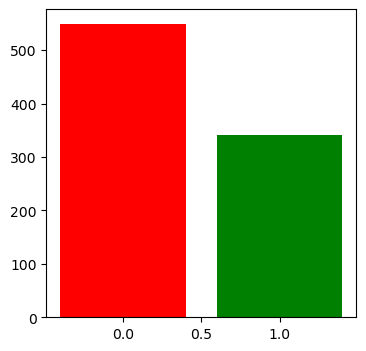

In [34]:
plt.figure(figsize=(4,4))
plt.bar(list(work1['Survived'].value_counts().keys()), list(work1['Survived'].value_counts()), color=["r","g"])
plt.show()

In [37]:
work1['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

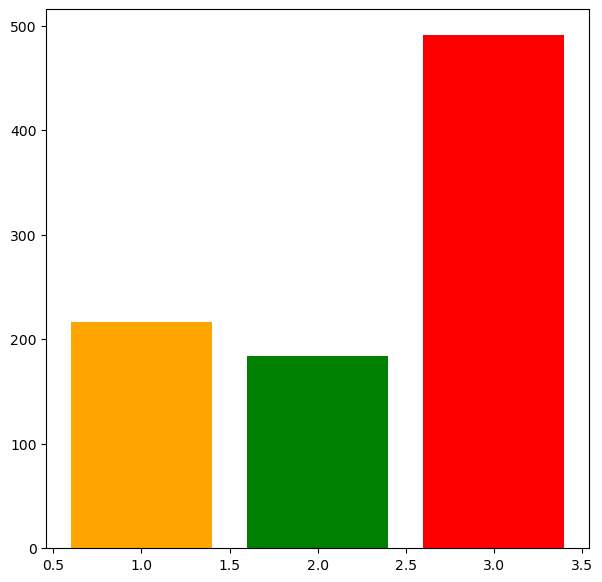

In [72]:
plt.figure(figsize=(7,7))
plt.bar(list(work1['Pclass'].value_counts().keys()),list(work1['Pclass'].value_counts()), color=["red","orange","green"])
plt.show()

In [43]:
work1['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

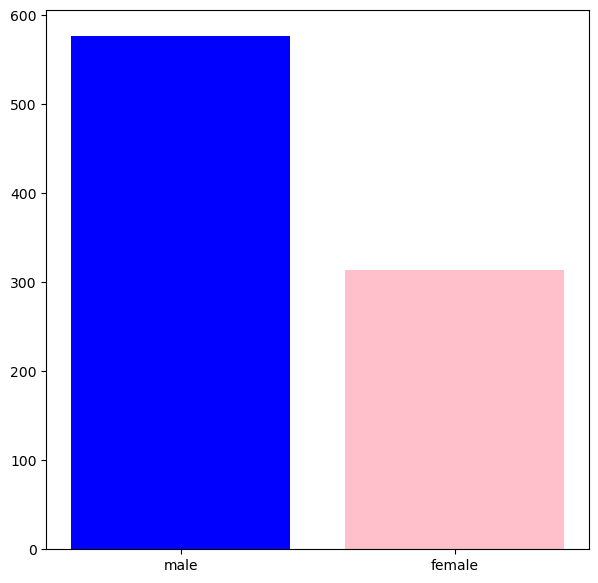

In [47]:
plt.figure(figsize=(7,7))
plt.bar(list(work1['Sex'].value_counts().keys()),list(work1['Sex'].value_counts()), color=["blue","pink"])
plt.show()

In [93]:
work1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
work1.replace({'Sex':{'male': 0 ,'female':1} }, inplace=True)
work1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [115]:
X=work1[['Pclass','Sex']]
Y=work1['Survived']

In [117]:
X,Y

(     Pclass  Sex
 0         3    0
 1         1    1
 2         3    1
 3         1    1
 4         3    0
 ..      ...  ...
 886       2    0
 887       1    1
 888       3    1
 889       1    0
 890       3    0
 
 [891 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.1,random_state=0)

In [127]:
print(X.shape,X_train.shape,X_test.shape)

(891, 2) (801, 2) (90, 2)


In [129]:
print(Y.shape,Y_train.shape,Y_test.shape)

(891,) (801,) (90,)


In [139]:
 from sklearn.linear_model import LogisticRegression
ml=LogisticRegression()
ml.fit(X_train,Y_train)

LogisticRegression()

In [147]:
X_test_prediction=ml.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0]


In [159]:
X_train_prediction=ml.predict(X_train)
print(X_train_prediction)

[0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 

In [149]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
627    1
380    1
483    1
516    1
505    0
Name: Survived, Length: 90, dtype: int64


In [151]:
print(Y_train)

815    0
877    0
193    1
523    1
634    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 801, dtype: int64


In [161]:
from sklearn.metrics import accuracy_score
train_accuracy =accuracy_score(X_train_prediction ,Y_train)
test_accuracy=accuracy_score(X_test_prediction,Y_test)
print(train_accuracy,test_accuracy)

0.7852684144818977 0.8
